In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

### Part 1: Prepare the Data

In [41]:
file_path = Path("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [42]:
# Column names
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [43]:
df.isnull().value_counts()

AGE    SPHEQ  AL     ACD    LT     VCD    SPORTHR  READHR  COMPHR  STUDYHR  TVHR   DIOPTERHR  MOMMY  DADMY  MYOPIC
False  False  False  False  False  False  False    False   False   False    False  False      False  False  False     618
dtype: int64

In [44]:
df.shape

(618, 15)

In [45]:
df.duplicated().sum()

0

In [46]:
# There were 81 myopic children samples and 537 non-myopic children samples
df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [47]:
labels=df["MYOPIC"]

In [48]:
# Remove the "MYOPIC" column from the dataset
df = df.drop("MYOPIC", axis=1)
path=Path('myopia-CLEANED.csv')
df.to_csv(path,index=False)

In [49]:
# Create a scaler to standardize the data
scaler = StandardScaler()

In [50]:
# Train the scaler with the data
X_Scaled=scaler.fit_transform(df)
X_Scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

### Part 2: Apply Dimensionality Reduction

In [51]:
# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(X_Scaled)

In [52]:
myopia_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [53]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [54]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [55]:
# Initialize t-SNE model t-distributed stochastic suiji neighbor embedding puls random_state=42,the visual will be stable
tsne = TSNE(learning_rate=250,n_components=3,perplexity=50,verbose=1,n_iter=2500)

In [56]:
# Reduce dimensions 
tsne_features = tsne.fit_transform(myopia_pca)

/Users/thomasgarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.001s...
[t-SNE] Computed neighbors for 618 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.040833
[t-SNE] KL divergence after 2500 iterations: 2.034883


In [57]:
# The dataset has 2 columns（x,y)
tsne_features.shape

(618, 3)

In [58]:
tsne_features

array([[ 102.71313  , -186.34021  , -181.35648  ],
       [  -3.194474 ,  -62.649124 ,  -29.002104 ],
       [ 185.97058  , -164.76152  ,   -5.9902525],
       ...,
       [ 132.18488  ,  236.5593   ,   13.419221 ],
       [ 183.39017  ,    8.431078 ,  158.91302  ],
       [  72.96379  ,   54.036003 ,   -8.297782 ]], dtype=float32)

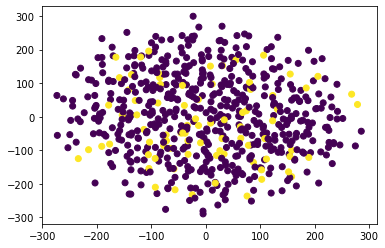

In [59]:
plt.scatter(tsne_features[:,0], tsne_features[:,1],c=labels)
plt.show()

### Part 3: Perform a Cluster Analysis with K-means

In [60]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


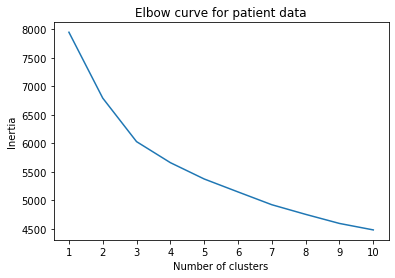

In [61]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for patient data')
plt.show()

In [62]:
# Create a Dataframe from the PCA transformed data for K-Means Modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df=pd.DataFrame(myopia_pca,columns=columns)
pca_df['class']=km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


In [63]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [64]:
clusters = get_clusters(5, pca_df)

/Users/thomasgarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/thomasgarcia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [65]:
clusters

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,4
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,3
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,4
...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,1
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,4
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,4
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,3


In [66]:
def show_clusters(df):
    plt.scatter(pca_df[1], pca_df[2], c=pca_df['class'])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

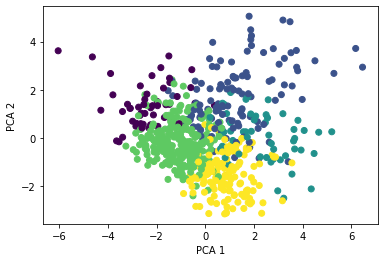

In [67]:
show_clusters(clusters)

### Part 4: Make a Recommendation


Based on the preparation of the data, performing dimensionality reduction with PCA and t-SNE and performing a cluster analysis with K-means, I found:

1.From the plot of elbow curve, the best value of k seems to be 3.

2.From the PCA model will preserve 91.9% of the explained variance in dimensinality reduction.

3. From the scatter plot of the t-SNE output, there are no distinct cluster. The t-SNE may be not helpful in finding clusters.

4. From the cluster analysis with K-means, some clustering patterns show up, but the dataset seems to be too small to do further preditions.

My recommendation:

The dataset may be too small to do further splitting and training of data and to make accurate prediction. In the future, to get a bigger dataset to perform the above models and make more accurate predictions.